# part1(PCA)

In [2]:
import pandas as pd
import numpy as np
IntrusionData = pd.read_csv('data.csv',sep=',',index_col = False)
Xmatrix = IntrusionData.values
LabelVector = Xmatrix[:,-1]
Xmatrix = Xmatrix[:,:-1]
meanVector = np.mean(Xmatrix,axis = 0)
CenteredXmatrix = Xmatrix - meanVector
SdVector = np.std(CenteredXmatrix.astype(float),axis = 0)
CenteredXmatrix /= SdVector
covOfCenteredXmatrix = np.array([(CenteredXmatrix[0,:].astype(float))]).T@ np.array([(CenteredXmatrix[0,:].astype(float))])
for i in range(1,len(CenteredXmatrix)):
    covOfCenteredXmatrix +=   np.array([(CenteredXmatrix[i,:].astype(float))]).T@ np.array([(CenteredXmatrix[i,:].astype(float))])
covOfCenteredXmatrix /= len(CenteredXmatrix)
eigenValues, eigenVectors = np.linalg.eig(covOfCenteredXmatrix)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
neededEigenVectors = []
for idx, val in enumerate(eigenValues):
    if (sum(eigenValues[0:idx])/sum(eigenValues))>0.9:
        neededEigenVectors = eigenVectors[:,0:idx]
        break
reconstructedXmatrix = CenteredXmatrix.astype(float)@neededEigenVectors
#newData = np.insert(reconstructedXmatrix.astype(str), 2, values=LabelVector, axis=1) 

reconstructedXmatrix.shape

# Part2(KMeans)

In [23]:
def getDistance(row1,row2):
    row1 = np.array(row1)
    row2 = np.array(row2)
    return (np.sum((np.abs(row1-row2))**2))**(1/2)
def getNearestClusterDistance(givenSample,meanVector1):
    distancesFromAllMeans = {}
    for i in meanVector1:
        distancesFromAllMeans[i] = getDistance(givenSample,meanVector1[i])
    #nearestMeanLabel = min(distancesFromAllMeans.items(), key=operator.itemgetter(1))[0]
    nearestMeanDistance = min(distancesFromAllMeans.values()); 
    return nearestMeanDistance
def getNearestCluster(givenSample,meanVector1):
    distancesFromAllMeans = {}
    for i in meanVector1:
        distancesFromAllMeans[i] = getDistance(givenSample,meanVector1[i])
    nearestMeanLabel = min(distancesFromAllMeans.items(), key=operator.itemgetter(1))[0]
    #nearestMeanDistance = min(distancesFromAllMeans.values()); 
    return nearestMeanLabel



meanVector = {}
import random
import operator
remainingIndices = list(range(0,len(reconstructedXmatrix)))
RandomIndex1 =random.randint(0,len(reconstructedXmatrix))
remainingIndices.remove(RandomIndex1)
meanVector[0] = reconstructedXmatrix[RandomIndex1,:]
#meanVector[0] = (reconstructedXmatrix[62233,:]+reconstructedXmatrix[59734,:]+reconstructedXmatrix[125429,:]+reconstructedXmatrix[101346,:]+reconstructedXmatrix[83454,:])/5
#meanVector[1] = reconstructedXmatrix[59734,:]

for k in range(1,5):
    distancesOfRemainingVerticesWithNearestMean = {}
    print(meanVector)
    for i in remainingIndices:
        distancesOfRemainingVerticesWithNearestMean[i] = (getNearestClusterDistance(reconstructedXmatrix[i,:],meanVector))**2
    #findMaxKeywithrespecttodistance
    nextVetexIndex = max(distancesOfRemainingVerticesWithNearestMean.items(), key=operator.itemgetter(1))[0]
    print(nextVetexIndex)
    max_value = max(distancesOfRemainingVerticesWithNearestMean.values()); 
    print(max_value)
    tempList = [key for key, value in distancesOfRemainingVerticesWithNearestMean.items() if value == max_value]
    print(tempList)
    #assign that key as a the next vertex
    meanVector[k] = reconstructedXmatrix[nextVetexIndex,:]
    #removethatvertexfromremainingIndices
    for i in tempList:
        remainingIndices.remove(i)
    #remainingIndices.remove(max(distancesOfRemainingVerticesWithNearestMean, key=distancesOfRemainingVerticesWithNearestMean.get))
    

getNearestClusterDistance(reconstructedXmatrix[11,:],meanVector)
getDistance(reconstructedXmatrix[11,:],reconstructedXmatrix[2233,:])

In [24]:
k = 5
meanVector = {}
import random
RandomIndices = random.sample(range(0,len(reconstructedXmatrix)), 5)
RandomIndices = [15126, 24342, 8449, 19992, 6418]
print(RandomIndices)
for i in range(0,k):
    #meanVector[i] = 
    meanVector[i] = reconstructedXmatrix[RandomIndices[i],:]

[15126, 24342, 8449, 19992, 6418]


In [25]:
iterationNumber = 0
#while (iterationNumber<30):
AssociatedClusterForEachPoint1 = []
import operator
while(True):
#for i in range(0,10)
    iterationNumber += 1
    print("iteration number "+str(iterationNumber))
    beforeAssociatedClusterForEachPoint1 = AssociatedClusterForEachPoint1.copy()
    AssociatedClusterForEachPoint1 = []
    for i in range(0,len(reconstructedXmatrix)):
        AssociatedClusterForEachPoint1.append(getNearestCluster(reconstructedXmatrix[i,:],meanVector))
    if(beforeAssociatedClusterForEachPoint1 == AssociatedClusterForEachPoint1):
        break
    distanceOfallPointsToTheirNearestMeans = 0
    for i in range(0,len(reconstructedXmatrix)):
        distanceOfallPointsToTheirNearestMeans += (getNearestClusterDistance(reconstructedXmatrix[i,:],meanVector))
    print('distanceOfallPointsToTheirNearestMeans is '+str(distanceOfallPointsToTheirNearestMeans))
    #distanceOfallPointsToTheirNearestMeans = 0
    for i in meanVector:
        numerVector = np.array([0.0]*len(meanVector[0]))
        count = 0
        for j,value in enumerate(AssociatedClusterForEachPoint1):
            if value == i:
                numerVector += reconstructedXmatrix[j,:]
                #print(reconstructedXmatrix[j,:])
                count += 1
        if count!= 0:
            print("centriod number - "+str(i)+" have points "+str(count))            
            meanVector[i] = (numerVector/count)
        else:
            print('no points associated to mean number')
            print(i)    

iteration number 1
distanceOfallPointsToTheirNearestMeans is 65446.29267835621
centriod number - 0 have points 3277
centriod number - 1 have points 14395
centriod number - 2 have points 4450
centriod number - 3 have points 1925
centriod number - 4 have points 951
iteration number 2
distanceOfallPointsToTheirNearestMeans is 62618.1481040664
centriod number - 0 have points 2845
centriod number - 1 have points 13803
centriod number - 2 have points 4071
centriod number - 3 have points 3191
centriod number - 4 have points 1088
iteration number 3
distanceOfallPointsToTheirNearestMeans is 55852.079655591755
centriod number - 0 have points 2682
centriod number - 1 have points 13833
centriod number - 2 have points 4221
centriod number - 3 have points 3173
centriod number - 4 have points 1089
iteration number 4
distanceOfallPointsToTheirNearestMeans is 54755.97075163514
centriod number - 0 have points 2610
centriod number - 1 have points 14025
centriod number - 2 have points 4301
centriod number

In [26]:
[9138, 122242, 71404, 99808, 97935]

[9138, 122242, 71404, 99808, 97935]

meanVector

InitialMeanIndices = [9138, 122242, 71404, 99808, 97935]
convergedMeanVector = {0: np.array([-0.22691395,  1.02406445,  0.62914381,  0.99550913, -0.63761498,
         2.4519174 , -1.08593541,  0.06480075, -0.40389522, -0.02652342,
        -0.24153266, -0.26781894, -0.02712858,  0.14675251]),
 1: np.array([ 2.03611977e+00, -6.88830525e-01,  1.01823782e-02,  2.05041531e-01,
         3.64706316e-01,  5.69887320e-02, -8.30691030e-02,  1.60627683e-02,
         4.06784279e-02,  9.80033887e-04,  2.55526508e-02, -2.45904934e-03,
        -4.97478967e-03, -9.61952951e-03]),
 2: np.array([-3.77480431e+00, -1.24188790e+00,  9.58046411e-03,  2.48647585e-01,
         1.38443859e-02, -2.81217685e-01,  1.73780634e-01,  1.46115350e-02,
         2.77712017e-02,  4.91214345e-03,  9.96833544e-03,  5.84494600e-02,
        -2.40969064e-03,  6.47835212e-02]),
 3: np.array([-4.47389125e-01,  5.70578373e+00, -1.06039823e-01, -2.20767543e-01,
         2.73673348e-01, -6.66253587e-01,  2.86856765e-01, -3.43002182e-02,
         3.81266449e-02, -1.73473161e-03,  4.29894564e-02,  4.46477549e-02,
         1.65634921e-03,  2.10422234e-02]),
 4: np.array([ 1.62633778e+00, -8.16807976e-01, -4.09606349e-01, -2.71483254e+00,
        -2.45983481e+00, -8.48831057e-02,  2.51235519e-01, -1.56178931e-01,
        -1.33155340e-01, -2.19776932e-03, -9.57646930e-02, -7.52279422e-02,
         6.04324740e-02, -3.28324686e-01])}
#iteration number 50
#centriod number - 0 have points 6899
#centriod number - 1 have points 60679
#centriod number - 2 have points 34454
#centriod number - 3 have points 14883
#centriod number - 4 have points 9058
[55579, 31003, 99170, 19907, 16799]
{0: array([-3.90921310e+00, -1.16608587e+00,  5.47047279e-02,  3.91829643e-01,
         1.71436182e-01, -9.20033466e-02,  1.05811609e-01,  1.41946505e-01,
        -1.09041281e-01,  3.51935131e-03, -7.47110297e-03,  7.42605720e-02,
         1.67794569e-02, -4.01073592e-01]),
 1: array([-3.53666853, -1.37040314, -0.06692081,  0.00737912, -0.25329905,
        -0.60322352,  0.28950226, -0.20207915,  0.26084471,  0.0073202 ,
         0.03961029,  0.03182918, -0.03525319,  0.85834743]),
 2: array([-4.45495582e-01,  5.70339476e+00, -1.06052628e-01, -2.20427142e-01,
         2.74276656e-01, -6.67098402e-01,  2.87190802e-01, -3.42581383e-02,
         3.81248789e-02, -1.74085791e-03,  4.30992561e-02,  4.46676271e-02,
         1.64680736e-03,  2.08479356e-02]),
 3: array([ 1.98726277e+00, -7.07523340e-01, -4.54788541e-02, -1.76794578e-01,
        -4.70493187e-03,  3.68466669e-02, -3.92515174e-02, -5.84846451e-03,
         1.81466026e-02,  6.06784784e-04,  9.56633012e-03, -1.16160902e-02,
         2.51185642e-03, -4.97805863e-02]),
 4: array([-0.21484518,  1.00938377,  0.6273943 ,  0.99202778, -0.60560153,
         2.42945908, -1.07329849,  0.05816891, -0.39665662, -0.02649777,
        -0.23490002, -0.26727531, -0.01628518,  0.13149941])}
centriod number - 0 have points 21739
centriod number - 1 have points 12754
centriod number - 2 have points 14895
centriod number - 3 have points 69560
centriod number - 4 have points 7025


np.unique(AssociatedClusterForEachPoint1)

type(LabelVector)

In [27]:
conMatrix = pd.crosstab(np.array(AssociatedClusterForEachPoint1),LabelVector)

print(conMatrix)

In [28]:
tempo = pd.DataFrame(conMatrix)
tempo

col_0,dos,normal,probe,r2l,u2r
row_0,,,,,
0,2545,11,7,0,0
1,922,12651,358,151,10
2,4266,28,71,0,0
3,1364,531,1057,10,0
4,17,143,820,36,0


In [29]:
tempo['label']=tempo.idxmax(axis=1)

In [30]:
for i in tempo.index:
    print('purity of cluster '+str(i)+" is "+str(np.max(np.array(tempo.iloc[[i],:-1].values))/np.sum(np.array(tempo.iloc[[i],:-1].values)))+" and its label is "+str(tempo.at[i,'label']))

purity of cluster 0 is 0.9929769801014436 and its label is dos
purity of cluster 1 is 0.8977434005109282 and its label is normal
purity of cluster 2 is 0.977319587628866 and its label is dos
purity of cluster 3 is 0.46049966239027684 and its label is dos
purity of cluster 4 is 0.8070866141732284 and its label is probe


tempo

In [66]:
tempoPurityOfEachclassinEachClusterlabel = tempo[:]
#print(tempoPurityOfEachclassinEachClusterlabel)
for i in tempo.index:
    for j in tempo.columns:
        #print(tempo.at[i,j])
        #print(np.sum(np.array(tempo.iloc[[i],:-1].values)))
        garbage = (tempo.at[i,j]/np.sum(np.array(tempo.iloc[[i],:-1].values)))
        garbage = float("{0:.2f}".format(garbage))
        tempoPurityOfEachclassinEachClusterlabel.loc[i,j] = garbage
        #print(tempoPurityOfEachclassinEachClusterlabel.at[i,j])
tempoPurityOfEachclassinEachClusterlabel 
        

col_0,dos,normal,probe,r2l,u2r
row_0,,,,,
0,0.07,0.90,0.03,0.01,0.0
1,0.46,0.18,0.36,0.00,0.0
2,0.98,0.01,0.01,0.00,0.0
3,0.02,0.14,0.81,0.04,0.0
4,0.00,1.00,0.00,0.00,0.0


#check scikit learn
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=5,n_init=10, max_iter=300, tol=0.0001, random_state=None).fit(reconstructedXmatrix)
kmeanslabels1 = kmeans.predict(reconstructedXmatrix)
conMatrix = pd.crosstab(kmeanslabels1,LabelVector)
#print(kmeans.cluster_centers_)
#(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)
tempo = pd.DataFrame(conMatrix)
tempo
tempo1['label']=tempo1.idxmax(axis=1)
for i in tempo1.index:
    print('purity of cluster '+str(i)+" is "+str(np.max(np.array(tempo1.iloc[[i],:-1].values))/np.sum(np.array(tempo1.iloc[[i],:-1].values)))+" and its label is "+str(tempo1.at[i,'label']))

# Part3(GMM)

In [44]:
from sklearn import mixture
#clusterer = GaussianMixture(5, 'diag')
#clusterer.fit(reconstructedXmatrix)
#cluster_labels = clusterer.predict(reconstructedXmatrix)
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=400,random_state= 0,n_init=20, init_params='kmeans').fit(reconstructedXmatrix)
labels = gmm.predict(reconstructedXmatrix)
zippedLabel = zip(labels,LabelVector)
conMatrix = pd.crosstab(labels,LabelVector)
#print(conMatrix)
tempo1 = pd.DataFrame(conMatrix)
tempo1

col_0,dos,normal,probe,r2l,u2r
row_0,,,,,
0,115,583,7,90,7
1,6124,0,0,0,0
2,27,1862,303,10,0
3,2757,2663,1117,7,0
4,91,8256,886,90,3


In [45]:
tempo1['label']=tempo1.idxmax(axis=1)

In [46]:
for i in tempo1.index:
    print('purity of cluster '+str(i)+" is "+str(np.max(np.array(tempo1.iloc[[i],:-1].values))/np.sum(np.array(tempo1.iloc[[i],:-1].values)))+" and its label is "+str(tempo1.at[i,'label']))

purity of cluster 0 is 0.726932668329177 and its label is normal
purity of cluster 1 is 1.0 and its label is dos
purity of cluster 2 is 0.8455949137148048 and its label is normal
purity of cluster 3 is 0.42130195599022 and its label is dos
purity of cluster 4 is 0.8852669954964615 and its label is normal


In [64]:
tempoPurityOfEachclassinEachClusterlabel = tempo[:]
#print(tempoPurityOfEachclassinEachClusterlabel)
for i in tempo.index:
    for j in tempo.columns:
        #print(tempo.at[i,j])
        #print(np.sum(np.array(tempo.iloc[[i],:-1].values)))
        garbage = (tempo.at[i,j]/np.sum(np.array(tempo.iloc[[i],:-1].values)))
        garbage = float("{0:.2f}".format(garbage))
        tempoPurityOfEachclassinEachClusterlabel.loc[i,j] = garbage
        #print(tempoPurityOfEachclassinEachClusterlabel.at[i,j])
tempoPurityOfEachclassinEachClusterlabel 
        

col_0,dos,normal,probe,r2l,u2r
row_0,,,,,
0,0.07,0.90,0.03,0.01,0.0
1,0.46,0.18,0.36,0.00,0.0
2,0.98,0.01,0.01,0.00,0.0
3,0.02,0.14,0.81,0.04,0.0
4,0.00,1.00,0.00,0.00,0.0


# part4(HAC)

In [38]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='single',compute_full_tree = 'auto') .fit(reconstructedXmatrix)
clustering 
#[0:30000,:]compute_full_tree : false
#AgglomerativeClustering(n_clusters=10,   
# affinity=‘cosine’, linkage=‘complete’)
#AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
 #           connectivity=None, linkage='ward', memory=None, n_clusters=2,
  #          pooling_func='deprecated')
#clustering.labels_
#array([1, 1, 1, 0, 0, 0])
#memory=None,

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [5]:
labelsForAgClus = clustering.labels_

labelsForAgClus

In [54]:
conMatrix = pd.crosstab(labelsForAgClus,LabelVector)

In [55]:
print(conMatrix)

col_0   dos  normal  probe  r2l  u2r
row_0                               
0      9114   13360   2312  193   10
1         0       0      1    0    0
2         0       2      0    4    0
3         0       1      0    0    0
4         0       1      0    0    0


In [56]:
tempo = pd.DataFrame(conMatrix)
#tempo1
tempo['label']=tempo.idxmax(axis=1)

for i in tempo.index:
    print('purity of cluster '+str(i)+" is "+str(np.max(np.array(tempo.iloc[[i],:-1].values))/np.sum(np.array(tempo.iloc[[i],:-1].values)))+" and its label is "+str(tempo.at[i,'label']))


purity of cluster 0 is 0.5346352395053824 and its label is normal
purity of cluster 1 is 1.0 and its label is probe
purity of cluster 2 is 0.6666666666666666 and its label is r2l
purity of cluster 3 is 1.0 and its label is normal
purity of cluster 4 is 1.0 and its label is normal


tempoPurityOfEachclassinEachClusterlabel = tempo[:]
#print(tempoPurityOfEachclassinEachClusterlabel)
for i in tempo.index:
    for j in tempo.columns:
        #print(tempo.at[i,j])
        #print(np.sum(np.array(tempo.iloc[[i],:-1].values)))
        garbage = (tempo.at[i,j]/np.sum(np.array(tempo.iloc[[i],:-1].values)))
        garbage = float("{0:.2f}".format(garbage))
        tempoPurityOfEachclassinEachClusterlabel.loc[i,j] = garbage
        #print(tempoPurityOfEachclassinEachClusterlabel.at[i,j])
tempoPurityOfEachclassinEachClusterlabel 
        

KNN
purity of cluster 0 is 0.9929769801014436 and its label is dos
purity of cluster 1 is 0.8977434005109282 and its label is normal
purity of cluster 2 is 0.977319587628866 and its label is dos
purity of cluster 3 is 0.46049966239027684 and its label is dos
purity of cluster 4 is 0.8070866141732284 and its label is probe
GMM
purity of cluster 0 is 0.726932668329177 and its label is normal
purity of cluster 1 is 1.0 and its label is dos
purity of cluster 2 is 0.8455949137148048 and its label is normal
purity of cluster 3 is 0.42130195599022 and its label is dos
purity of cluster 4 is 0.8852669954964615 and its label is normal
Hierarchial (AC)
purity of cluster 0 is 0.534894894894895 and its label is normal
purity of cluster 1 is 1.0 and its label is normal
purity of cluster 2 is 0.6666666666666666 and its label is r2l
purity of cluster 3 is 1.0 and its label is probe
purity of cluster 4 is 0.9285714285714286 and its label is r2l

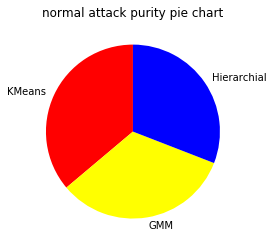

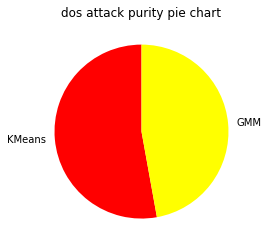

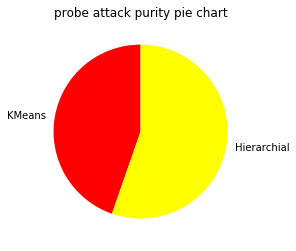

In [50]:
import matplotlib.pyplot as plt
slices_hours = [0.8977434005109282,(0.8852669954964615+0.726932668329177+ 0.8455949137148048)/3,(0.534894894894895+1.0)/2]
activities = ['KMeans', 'GMM','Hierarchial']
colors = ['r', 'yellow','blue']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90)#, autopct='%.1f%%')
plt.title('normal attack purity pie chart')
plt.show()
plt.show()

slices_hours = [( 0.9929769801014436+0.977319587628866+0.46049966239027684)/3,(0.9872352770525095+ 0.45915966386554624)/2]
activities = ['KMeans', 'GMM']
colors = ['r', 'yellow']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90)#, autopct='%.1f%%')
plt.title('dos attack purity pie chart')
plt.show()
plt.show()

slices_hours = [0.8070866141732284,1]
activities = ['KMeans', 'Hierarchial']
colors = ['r', 'yellow']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90)#, autopct='%.1f%%')
plt.title('probe attack purity pie chart')
plt.show()
plt.show()